<a href="https://colab.research.google.com/github/kipsangchepesa/Core12_moduleII-IP/blob/main/Moringa_Data_Science_Core12__Module_II_Week__8__Independent_Project_2021_12_Mutai_Nicholas_Kipsang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Machine Learning: Decision Trees and SVM Nairobi Hospital clinical camp to test for hypothyroidism.

Using the dataset collected during the clinical camp to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#Part 1: Decision trees: Random forests, Ada boosted trees, and gradient boosted trees.

##Importing the libraries.

In [1]:
import pandas as pd #for data manipulation and analysis
import numpy as np#for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices
import seaborn as sns#for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures
import matplotlib.pyplot as plt

# Tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
# Function to diable warnings
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading 
campdf=pd.read_csv('http://bit.ly/hypothyroid_data')

#Checking for dataset


In [3]:
campdf

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [4]:
# Checking the structure
print('Clinical camp dataset has ',campdf.shape[False],'rows and ',campdf.shape[True],' Columns')

Clinical camp dataset has  3163 rows and  26  Columns


In [5]:
#checking for datatypes of the datapoints 
campdf.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All datapoints are of type objects 

#External Data Validation


#Cleaning the dataset

In [6]:
# Converting the numerical dataypes to integers and floats
campdf[['age','TSH','T3','TT4','T4U','FTI','TBG']]=campdf[['age','TSH','T3','TT4','T4U','FTI','TBG']].apply(pd.to_numeric,errors='coerce')
campdf.dtypes


status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

##Checking for missing values

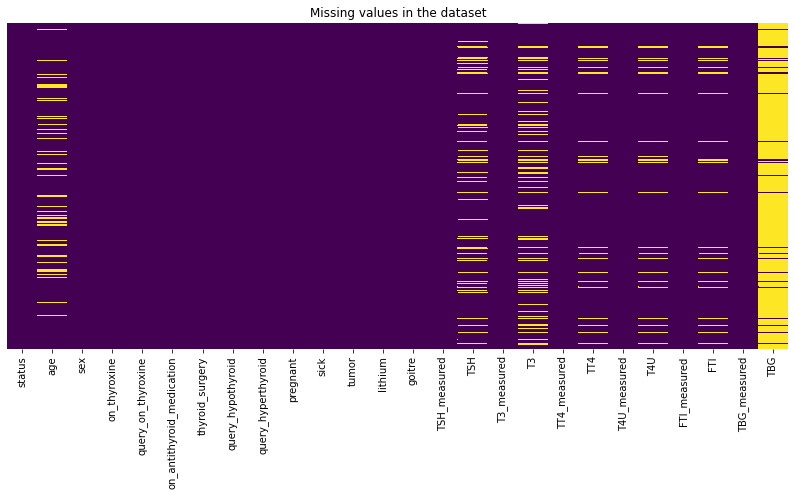

In [7]:
#Checking for missing values
plt.figure(figsize=(14,6))
sns.heatmap(campdf.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');
# There are missing values in the Age,TSH,T3,TT4,T4U,FF1,and the most missing values are found in the TBG column

In [8]:
#Checking the percentage of null values
def missing_percentage(data):
    p_miss=((data.isnull().sum() / len(data))*100)
    missing_value_df=pd.DataFrame({'percent_missing': p_miss},index=data.columns)
    return missing_value_df
print(missing_percentage(campdf))
print(campdf.shape)

                           percent_missing
status                            0.000000
age                              14.100537
sex                               0.000000
on_thyroxine                      0.000000
query_on_thyroxine                0.000000
on_antithyroid_medication         0.000000
thyroid_surgery                   0.000000
query_hypothyroid                 0.000000
query_hyperthyroid                0.000000
pregnant                          0.000000
sick                              0.000000
tumor                             0.000000
lithium                           0.000000
goitre                            0.000000
TSH_measured                      0.000000
TSH                              14.796080
T3_measured                       0.000000
T3                               21.972811
TT4_measured                      0.000000
TT4                               7.872273
T4U_measured                      0.000000
T4U                               7.840658
FTI_measure

TBG column has a high percentage of missing values at 91%, followed by T3 column with 21%

In [9]:
## Dealing with missing values
def max_min(data,column):
  df1=data[column].max()
  df2=data[column].min()
  # df3=data[column].mode()
  df3=data[column].mean()
  print(df1,df2,df3)
max_min(campdf,'age')
max_min(campdf,'TSH')
max_min(campdf,'T3')
max_min(campdf,'TT4')
max_min(campdf,'FTI')
max_min(campdf,'TBG')

98.0 1.0 51.154214206845786
530.0 0.0 5.923179962894247
10.2 0.0 1.9397487844408425
450.0 2.0 108.85000000000001
881.0 0.0 115.39777091906723
122.0 0.0 31.28307692307692


In [10]:
# Filling the null values in the age,TSH,T3,TT4,T4U and FT1 column with the mean 
def missing_val(data,col):
  df=data[col].fillna(data[col].mean(),inplace=True)
  return df
missing_val(campdf,'age')
missing_val(campdf,'TSH')
missing_val(campdf,'T3')
missing_val(campdf,'TT4')
missing_val(campdf,'T4U')
missing_val(campdf,'FTI')

I we drop the null values it will lead to 14% and 21% loss in the T3,TSH and about 7% of TT4 and FTI thus i have filled them with the mean for ease in analysis. The 14% missing values in the age column were filled with the mean as it has the highest frequency and suits the distribution of ages as will be seen in analysis

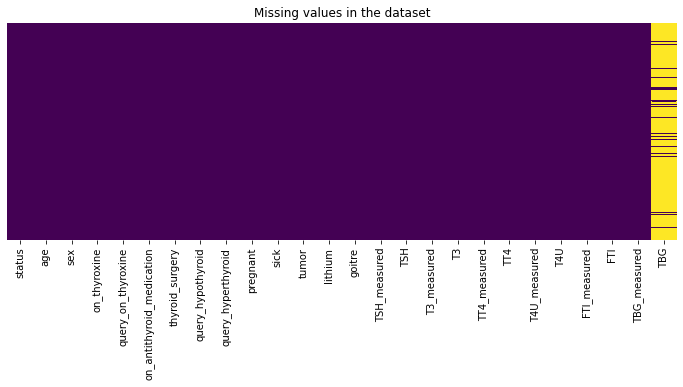

In [11]:
#plotting heatmap again to check the results of our action 
plt.figure(figsize=(12,4))
sns.heatmap(campdf.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset'); 


The age column has been filled succcefully and it will not be affected by fillna

In [12]:
#Dropping TBG column is reasonable because it has 91% of the data missing
campdf=campdf.drop(columns=['TBG'],axis=1)
campdf.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
dtype: bool

In [13]:
print('campdf dataset now has ',campdf.shape[False],'rows and ',campdf.shape[True],' Columns')

campdf dataset now has  3163 rows and  25  Columns


##Checking for duplicates

In [14]:
# Checking for duplicated data
print("There is " + str(campdf.duplicated().any().sum()) + " duplicated values")
# There is only one duplicated value 

There is 1 duplicated values


In [15]:
# Dropping the duplicated
campdf.drop_duplicates(inplace=True)
# # Confirming the operation
print("There is " + str(campdf.duplicated().any().sum()) + " duplicated values")

There is 0 duplicated values


In [16]:
#checking sex columns for its unique values
campdf['sex'].unique()

array(['M', 'F', '?'], dtype=object)

There are three unique values in sex column that is male, female and ? which should be replaced by F/M

In [17]:
#Doing so using lambda function
campdf['sex']=campdf['sex'].apply(lambda x:'F/M' if x=='?' else('M' if x=='M' else 'F'))
campdf['sex'].unique()

array(['M', 'F', 'F/M'], dtype=object)

#Exploratory Data Analysis

##a.) Univariate Analysis

Columns that has continuous data

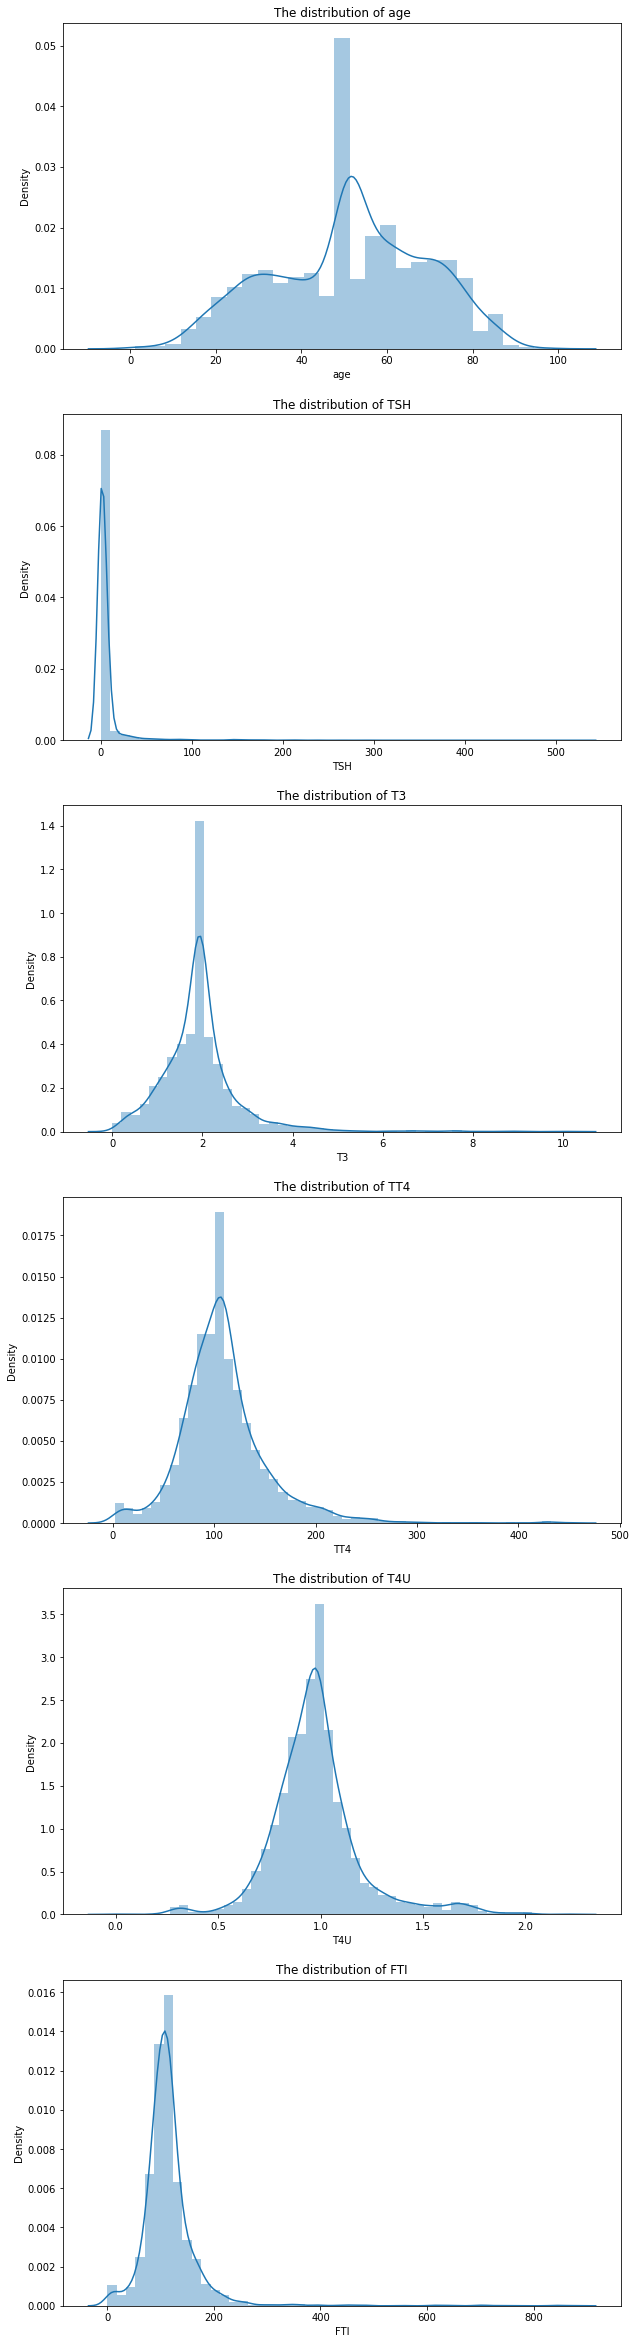

In [18]:
continuous_col=[ 'age','TSH','T3','TT4','T4U','FTI']
fig,ax=plt.subplots(len(continuous_col),figsize=(10,42))
for i,cols in enumerate(continuous_col):
  sns.distplot(campdf[cols],ax=ax[i]) 
  ax[i].set_title('The distribution of '+format(cols))

categorical columns

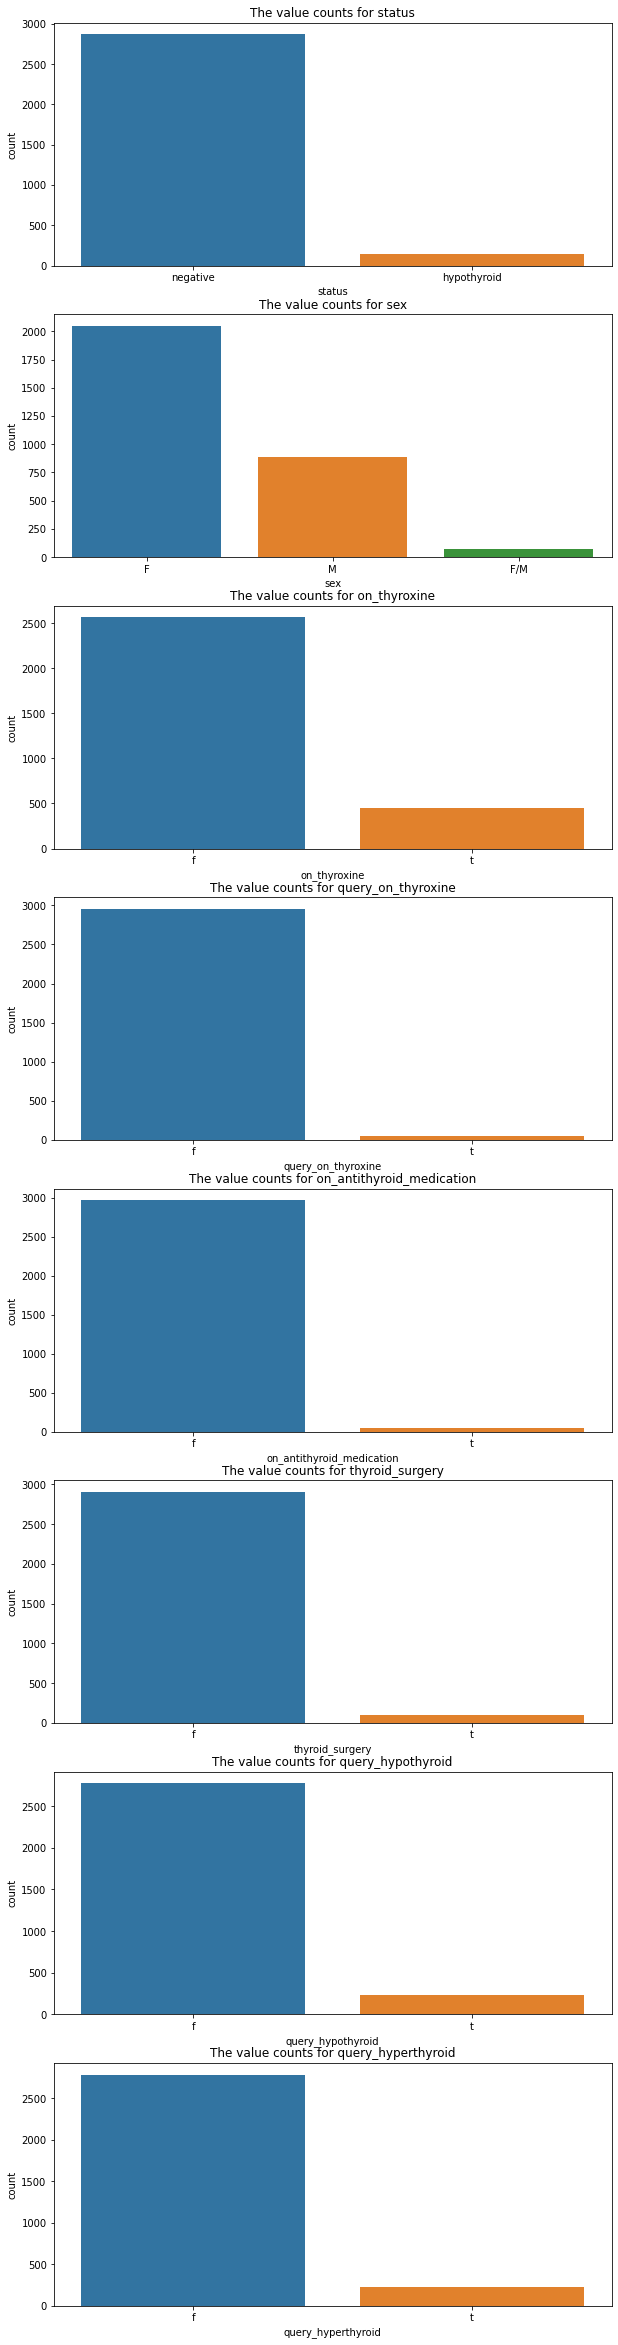

In [19]:
categoricals=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid']
fig,ax=plt.subplots(len(categoricals),figsize=(10,42))
for i,cols in enumerate(categoricals):
  sns.countplot(campdf[cols],order=campdf[cols].value_counts().index,ax=ax[i]) 
  ax[i].set_title('The value counts for '+format(cols))

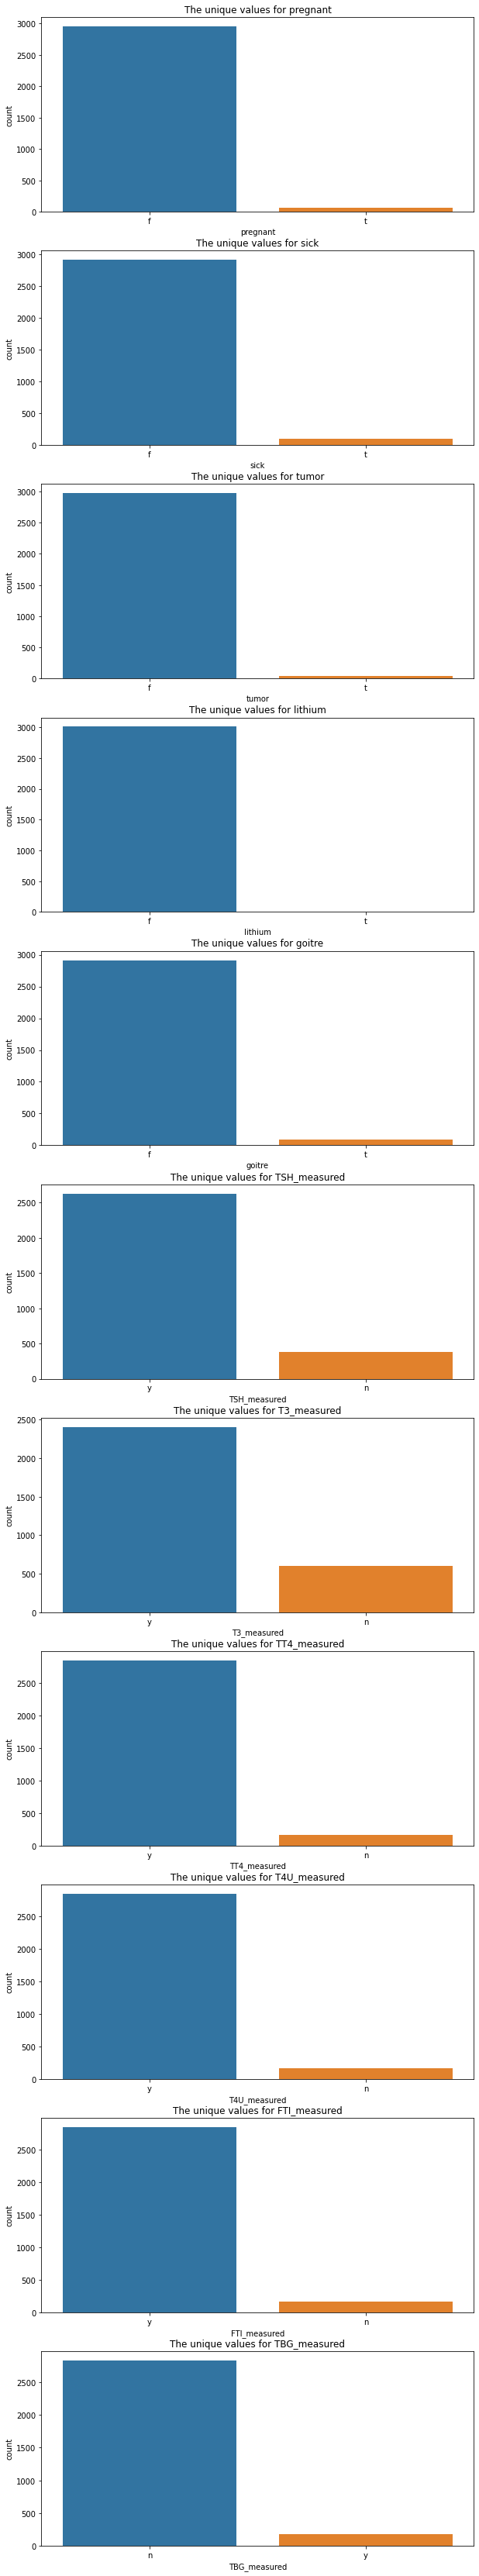

In [20]:
categoricals=['pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
fig,ax=plt.subplots(len(categoricals),figsize=(10,60))
for i,cols in enumerate(categoricals):
  sns.countplot(campdf[cols],order=campdf[cols].value_counts().index,ax=ax[i]) 
  ax[i].set_title('The unique values for '+format(cols))

##b.) Bivariate analysis

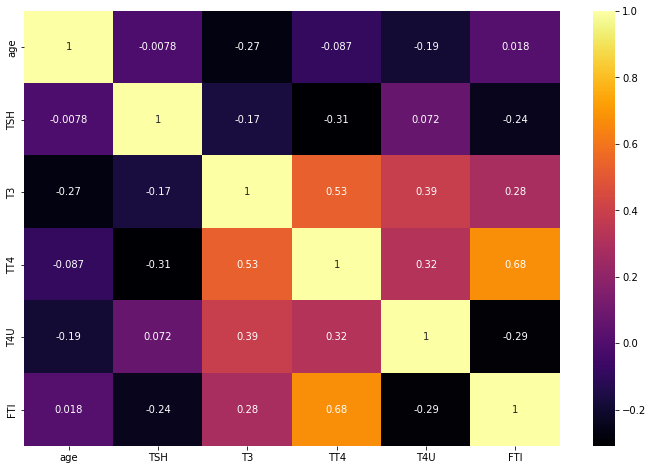

In [21]:
 # Slicing the numerical columns
 numerical = campdf.select_dtypes(include=['int64','float64','Int64'])[:]
 numerical
 correlation=numerical.corr()
 # Checking the correlation in the set
 plt.figure(figsize=(12,8))
sns.heatmap(correlation, cmap="inferno", annot=True)
plt.show() 

##c.) Multivariate analysis

In [22]:
#defining a function to plot bar plots by just passing columns 
def barplots(data,col1,col2,col3):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data,hue=col3,palette='Blues_r')
  plt.title('The relationship between '+str(col1) +' , '+ str(col2) +' and '+str(col3),fontsize=15)
  plt.show()

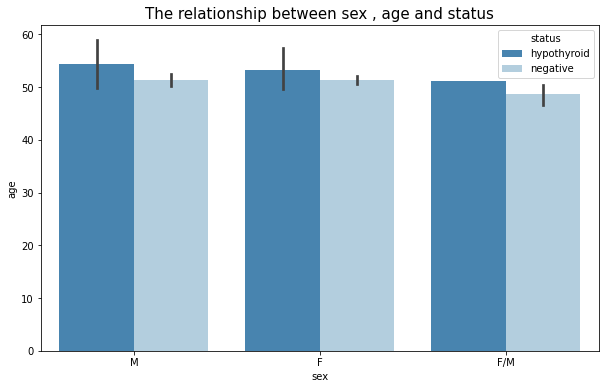

In [23]:
#passing argument to the parameters
barplots(campdf,'sex','age','status')

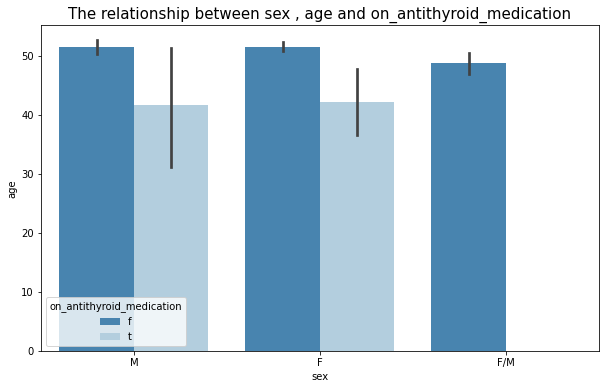

In [24]:
barplots(campdf,'sex','age','on_antithyroid_medication')

#Feature engineering 


In [25]:
# Encoding the categorical columns to prepare them for analysis
le=LabelEncoder()
Cols=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
for i in Cols:
  le.fit(campdf[i])
  campdf[i]=le.transform(campdf[i])
campdf
campdf.dtypes
# Label w=enciding them all at once was because they didnt have numerous classes thus true is given a value of 1 and false 0 ,yes is given a value one and no 0 while male and female are given 0 and one respectively.

status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
dtype: object

Checking if it has been sucessfully encoded 

In [27]:
campdf.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


#Implementing the solution

##a). Checking for multicorlinearlity

In [28]:
# Features to be used in predictions as predictors
X_feat=campdf.drop(columns=['status'],axis=1)
# X_feat will be used whien checcking the specific columns used in the trees
X=X_feat.values
X
# Extracting the target variable
Y_label=campdf['status']
Y=Y_label.values
Y
# Calculating the Variance inflation factor of the specific columns
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_feat.values, i) for i in range(X_feat.shape[1])]
vif["features"] = X_feat.columns
vif


,VIF Factor,features
0,10.396948,age
1,1.605894,sex
2,1.386858,on_thyroxine
3,1.070623,query_on_thyroxine
4,1.044035,on_antithyroid_medication
5,1.046933,thyroid_surgery
6,1.116168,query_hypothyroid
7,1.188514,query_hyperthyroid
8,1.175280,pregnant
9,1.062140,sick


From the corlinearlity check, Thyroxine (T4U) and Free thyroxine index (FTI) have a high vif because they seem to explain similar variance within the dataset. on the removal of one of the column we will see the change in the vif of the set to avoid an instance of multicorlinearlity in training.
 Therefore will drop most of the columns till we have VIF less than 10

In [29]:
X_feat2=X_feat.drop(columns=['T4U_measured','T4U_measured','TT4_measured','TSH_measured','FTI_measured','TT4','T4U'],axis=1)
X_feat2
# Recheking the vif of the same set.
X1=X_feat2.values
X1
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_feat2.values, i) for i in range(X_feat2.shape[1])]
vif["features"] = X_feat2.columns
vif

,VIF Factor,features
0,6.627495,age
1,1.490597,sex
2,1.266622,on_thyroxine
3,1.036459,query_on_thyroxine
4,1.041629,on_antithyroid_medication
5,1.040295,thyroid_surgery
6,1.105400,query_hypothyroid
7,1.166300,query_hyperthyroid
8,1.098066,pregnant
9,1.058501,sick


#Modelling 

##Baseline model: Random Forest

In [30]:
#Using random forest as my baseline model
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.2,random_state=1)
#Instantiating my model
forest=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=6)
#Fitting my model
forest=forest.fit(X_train,Y_train)
# Predicting the results of my model
Y_forest_pred=forest.predict(X_test)
# Evaluating the model using accuracy score
ac=accuracy_score(Y_test,Y_forest_pred)
cm=confusion_matrix(Y_test,Y_forest_pred)
cr=classification_report(Y_test,Y_forest_pred)
# Printing the evaluations
print(ac)
print(cm)
print(cr)

0.9751243781094527
[[ 20  11]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.98      0.99      0.99       572

    accuracy                           0.98       603
   macro avg       0.91      0.82      0.86       603
weighted avg       0.97      0.98      0.97       603



The baseline model attained 97% accuracy , with 20 true positives and 568 true negative, this can be attributed to the influx in non-hypothyroidic patients in dataset samples. Without forgetting the fact that there were still 11 false negatives and 4 false positive and an accuracy of 97% indicates a case of over fitting. With a presicion of 98 % for diagnosing hypothyroidism i will optimize the baseline model using (hyperparameter tuning) to ensure the parameters used are fit for the model

###Hyperparameter tuning 

Using Grid search cv  to obtain the best parameters to have the best performing model.

In [31]:
# Obtaining the parameters that need to be tuned using 
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
#Using Grid searchcv 
# Create a based model
rf = RandomForestClassifier()
#Obtaining the param grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 10, 15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]}

# Using ROC_AUC score to check the performance of the model and its ability to distinguish between classes since they are binary
forest_search=GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=1,cv=3)
# Fitting the model
forest_search.fit(X_train,Y_train)
#Obtaining the best model/estimator
best_model=forest_search.best_estimator_
# Making predictions using the best model
Y_search_pred=best_model.predict(X_test)

In [33]:
#Getting the accuracy score
ac_search=accuracy_score(Y_test, Y_search_pred)
cm_search=confusion_matrix(Y_test,Y_search_pred)
cr_search=classification_report(Y_test,Y_search_pred)
# Printing out all the evaluations
print(ac_search)
print(cm_search)
print(cr_search)

0.9751243781094527
[[ 20  11]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.98      0.99      0.99       572

    accuracy                           0.98       603
   macro avg       0.91      0.82      0.86       603
weighted avg       0.97      0.98      0.97       603



It performed as the  random forest 

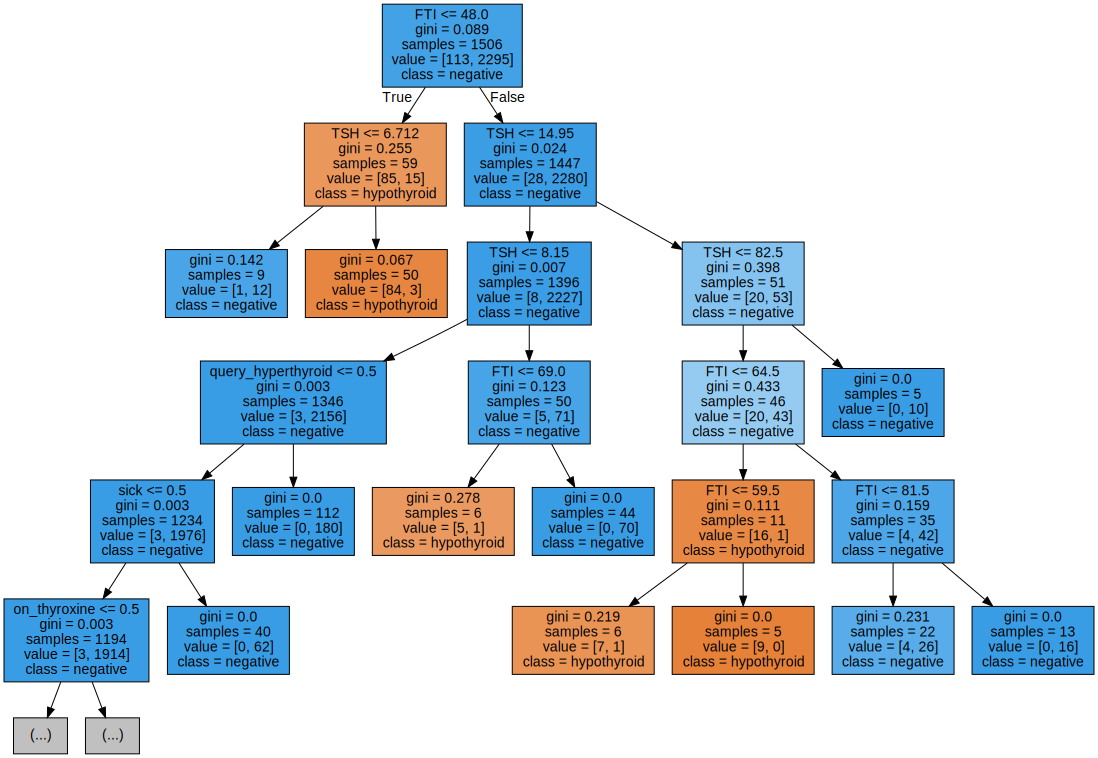

In [34]:
trees=best_model.estimators_[50]
# Vizualizing the random forest
from sklearn import tree
import graphviz
my_forest=export_graphviz(trees,
                               max_depth=5,
                               feature_names=X_feat2.columns,
                               class_names=['hypothyroid','negative'],filled=True)
graph=graphviz.Source(my_forest,format='png')

graph

Checking for feature importance that were used for classification

Text(0.5, 1.0, 'A plot of the features used for classification ')

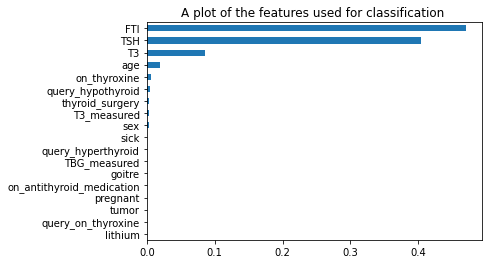

In [35]:
importance_rf=pd.Series(best_model.feature_importances_,index=X_feat2.columns)
# Sorting the features
sorted=importance_rf.sort_values()
#Plotting the features with their importances
sorted.plot(kind='barh')
plt.title('A plot of the features used for classification ')

From the visualization FTI,TSH,T3,age,query on hypothyroid,on thyroxine,measured T3 and sex were used for classification.

##Gradient Boosting

In [36]:
# Using gradient boost to classify our set
grad_class=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=10)
# Fitting our training set
grad_class.fit(X_train,Y_train)
# predicting the diagnosis
Y_grad_pred=grad_class.predict(X_test)
# Measuring the accuracy of our model
ac_grad=accuracy_score(Y_test,Y_grad_pred)
cm_grad=confusion_matrix(Y_test,Y_grad_pred)
cr_grad=classification_report(Y_test,Y_grad_pred)
# Printing the accuracy score and classification report
print(ac_grad)
print(cm_grad)
print(cr_grad)

0.988391376451078
[[ 28   3]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.99      0.99      0.99       572

    accuracy                           0.99       603
   macro avg       0.93      0.95      0.94       603
weighted avg       0.99      0.99      0.99       603



Gradient Boost is performing better at 99% than the random forest and  We will use hyper parameters to get the right model to perform an exelent job at predicting the status of patients. 

###Hyperparameter tuning 

In [37]:
# Getting the parameters used in gradient boost
grad_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
gb = GradientBoostingClassifier()
# Obtaining the param grid
param_grid_grad = {'max_depth': [3, 5, 10, 15],
                    'max_features': [2, 3, 5 ],
                    'min_samples_leaf': [3, 4, 5, 8],
                    'min_samples_split': [8, 10, 12, 18, 20],
                    'n_estimators': [100, 200, 300]}

gradient_search=GridSearchCV(estimator=gb,
                           param_grid=param_grid_grad,
                           scoring='accuracy',
                           n_jobs=1,cv=5,verbose=1)

Fitting the model

In [ ]:
# Fitting the model
gradient_search.fit(X_train,Y_train)
# # Obtaining the best model/estimator
best_model_grad=gradient_search.best_estimator_
# Making predictions using the best model
Y_search_pred_grad=best_model_grad.predict(X_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


Measuring the accuracy of gradientboost model

In [ ]:
# Measuring the accuracy of our model
ac_search_grad=accuracy_score(Y_test,Y_search_pred_grad)
cm_search_grad=confusion_matrix(Y_test,Y_search_pred_grad)
cr_search_grad=classification_report(Y_test,Y_search_pred_grad)
# Printing the accuracy score and classification report
print(ac_search_grad)
print(cm_search_grad)
print(cr_search_grad)